#### Análisis y Procesamiento de Señales

# Tarea Semanal N°6
## *Respuesta en frecuencia de Filtros Pasivos RLC*

#### Augusto Colugnatti

## Introducción teórica

El objetivo de todo filtro analógico es, para una cierta señal analógica, atenuar determinados rangos de frecuencia no deseados y permitir el paso de otros. Esto se logra a través de un diseño circuital que permita establecer tanto zonas de paso, donde quiero alterar lo menos posible la información de la señal, como de rechazo, donde esta deberá mitigarse con la atenuación deseada.

Se lo considera a un filtro *pasivo* cuando este no requiere de una fuente de alimentación externa. Por tal motivo, solo posee la capacidad de atenuar, y no de amplificar. Por otro lado, será de carácter *analógico* por trabajar con señales de naturaleza continua, es decir, también analógicas.
En esencia, un filtro pasivo analógico es un circuito electrónico compuesto por resistencias, capacitores e inductores, carente de alimentación externa, capaz de modificar la atenuación de las frecuencias deseadas de una determinada señal analógica.

---

El circuito que se muestra a continuación de trata de un divisor de tensión. Esto permite calcular una tensión de salida $V_{out}$ en función de una entrada $V_{in}$ como

\begin{equation}
V_{out} = V_{in} \frac{Z_2}{Z_1+Z_2}
\end{equation}

Sin embargo, como bien es sabido, tanto los capacitores como los inductores tienen un comportamiento que depende de la frecuencia de la red. Para situaciones como esta, que ameritan una herramienta capaz de analizar el circuito a distintas frecuencias, se introduce la **Función de Transferencia**:

\begin{equation}
T_{(s)} = \frac{V_{out(s)}}{V_{in(s)}}
\end{equation}

Observar que 's' corresponde a la variable en el dominio de Laplace, compuesta por una parte real y una imaginaria, tal que $s=\sigma+j\omega$. Al asignar $\sigma=0$, estoy asumiendo que toda respuesta transitoria que pueda tener el filtro ya resulta extinguida, y analizo únicamente su respuesta en régimen estacionario. Por lo tanto, se obtiene la **Respuesta en Frecuencia** como

\begin{equation}
T_{(s)} \Bigg|_{s=j\omega} = T_{(j\omega)}
\end{equation}

Analizar la respuesta en frecuencia de la función de transferencia, implica
- Conocer su valor absoluto $|T_{(s)}|$, es decir, su capacidad de atenuación para cada frecuencia.
- Conocer su fase $\measuredangle T_{(s)}$, es decir, qué tanto retrasa el circuito a cada frecuencia de la señal analógica.
---

## Desarrollo

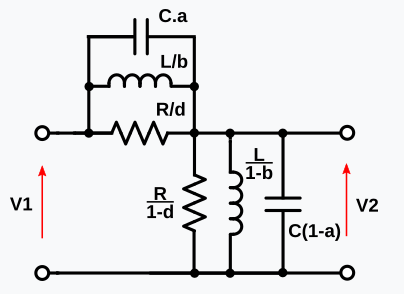

#### *Desarrollo en papel...*

Se obtuvo la función de transferencia como una SOS (*sección bicuadrática, secciones de segundo orden*) de la pinta

\begin{equation}
T(s)=k \cdot \frac{s^2+s⋅ω_{0Z}/Q_Z+ω^2_{0Z}}{s^2+s⋅ω_{0P}/Q_P+ω^2_{0P}}
\end{equation}

Además, se parametrizaron los coeficientes de ambos polinomios en función de los elementos de la red, como se muestra a continuación.


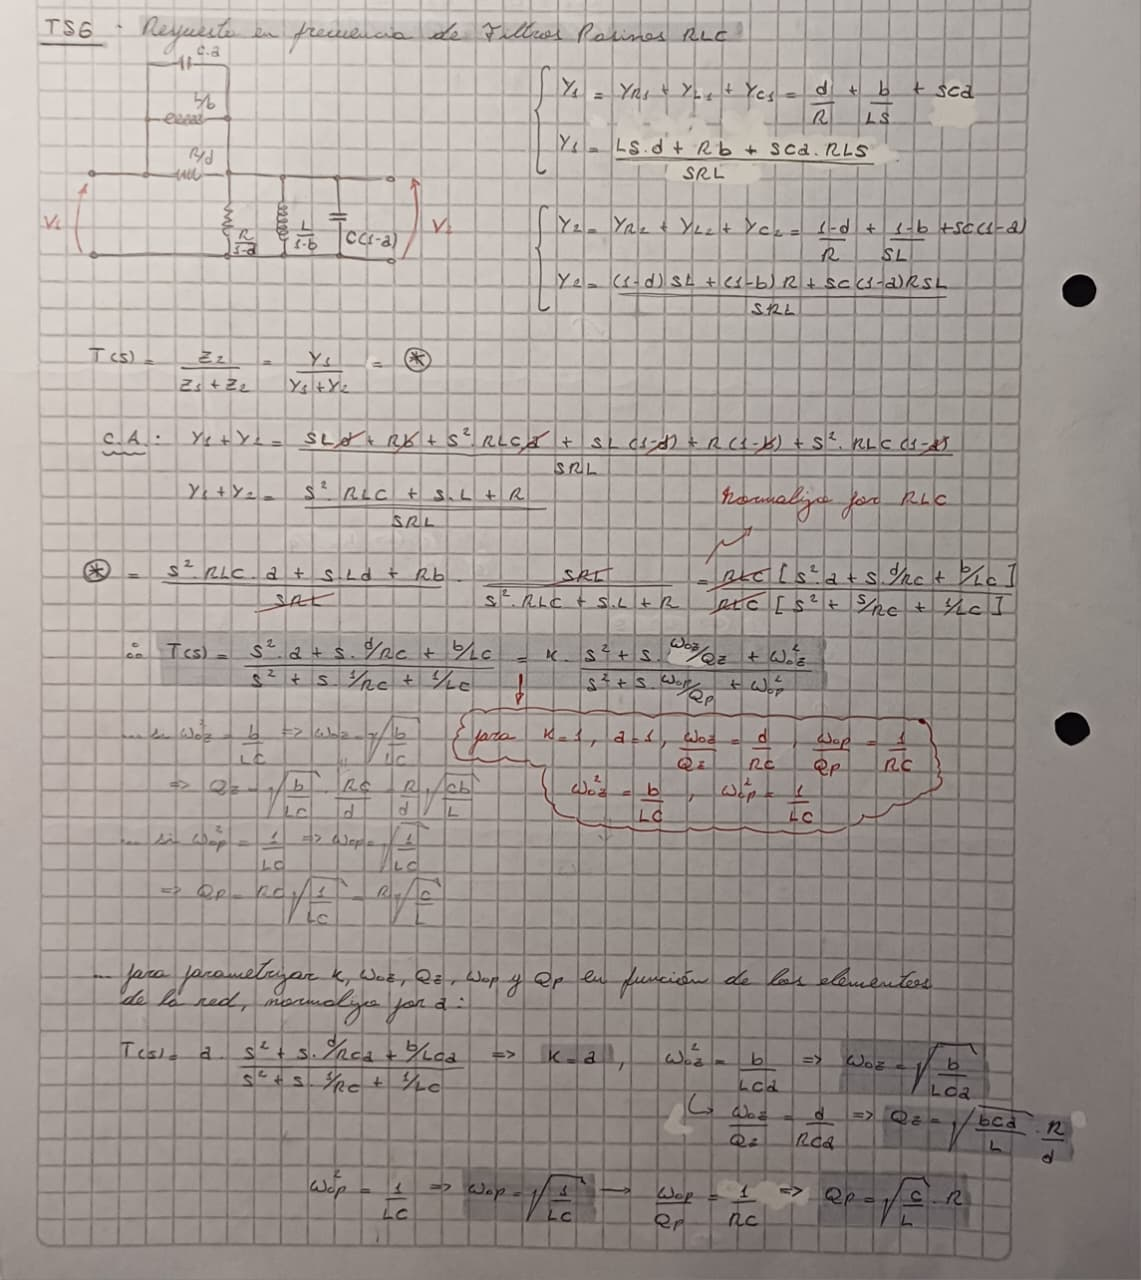

Luego, dadas las siguientes funciones de transferencia, se utilizó la red bicuadrádica anterior para hallar los elementos del circuito correspondientes a cada una de ellas.

$$ T_{1(s)}=\frac{s^2+9}{s^2+s\sqrt{2}+1} $$
$$ T_{2(s)}=\frac{s^2+1/9}{s^2+s\cdot 1/5+1} $$
$$ T_{3(s)}=\frac{s^2+s\cdot 1/5+1}{s^2+s\sqrt{2}+1} $$


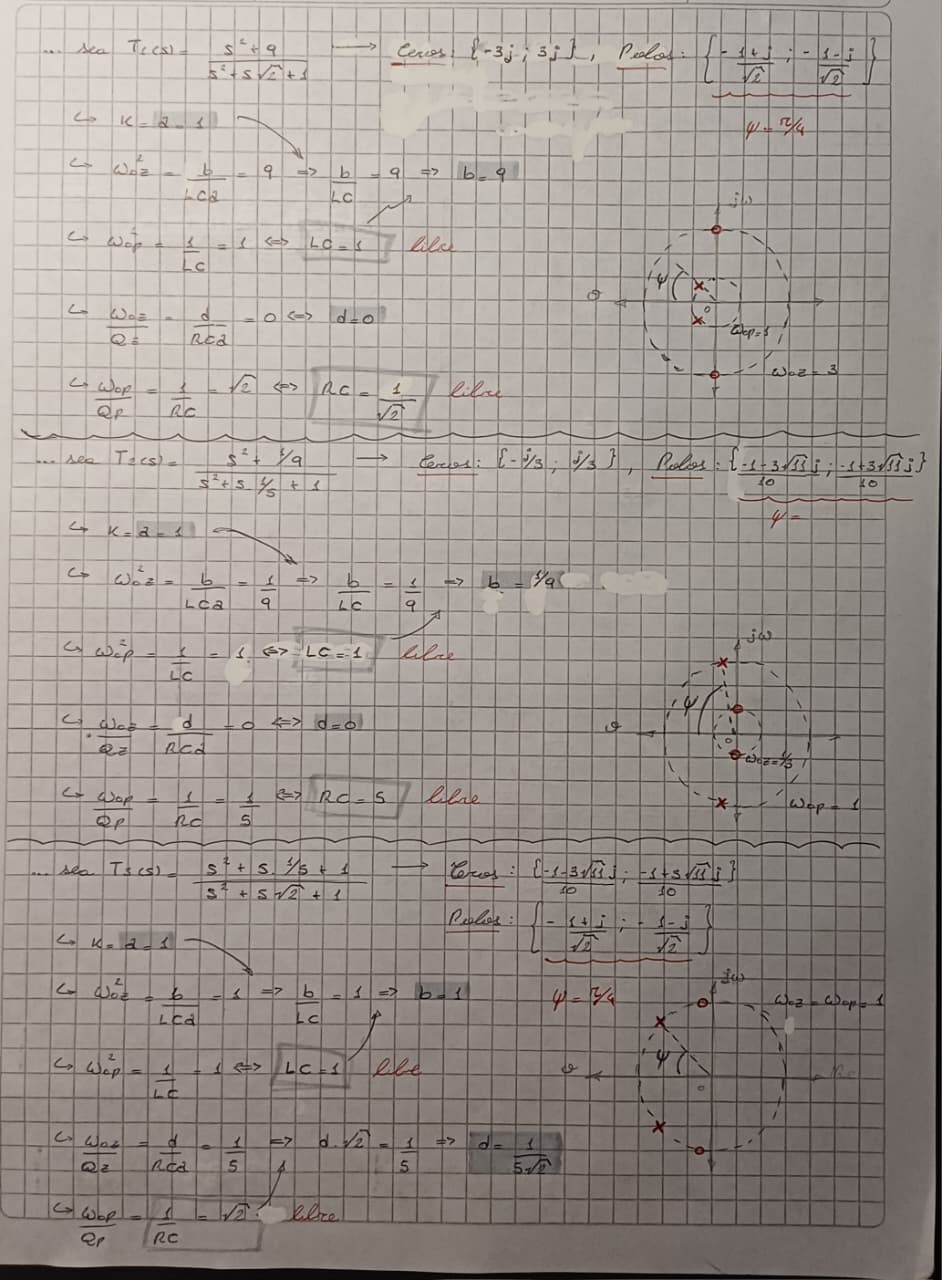

Esto permitió implementar en Python el siguiente código, capaz de calcular y graficar las respuestas de módulo y fase de cada función, así como esquematizar sus respectivos diagramas de polos y ceros.

#### *Desarrollo en código...*

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from numpy.fft import fft
import scipy.signal as sig

# ---------------------------------- Funciones transferencia ---------------------------------- #

b_1 = [1, 0, 9]          # coeficientes del numerador
a_1 = [1, np.sqrt(2), 1] # coeficientes del denominador

b_2 = [1, 0, 1/9]
a_2 = [1, 1/5, 1]

b_3 = [1, 1/5, 1]
a_3 = [1, np.sqrt(2), 1]

# --------------------------------------- Polos y ceros --------------------------------------- #

z_1, p_1, k_1 = sig.tf2zpk (b = b_1, a = a_1)
z_2, p_2, k_2 = sig.tf2zpk (b = b_2, a = a_2)
z_3, p_3, k_3 = sig.tf2zpk (b = b_3, a = a_3)

# -------------------------------- Respuestas de módulo y fase -------------------------------- #

w_1, h_1 = sig.freqs (b = b_1, a = a_1)
w_2, h_2 = sig.freqs (b = b_2, a = a_2)
w_3, h_3 = sig.freqs (b = b_3, a = a_3)

h_1_abs = np.abs (h_1)
h_2_abs = np.abs (h_2)
h_3_abs = np.abs (h_3)

fase_1 = np.unwrap (np.angle(h_1))
fase_2 = np.unwrap (np.angle(h_2))
fase_3 = np.unwrap (np.angle(h_3))

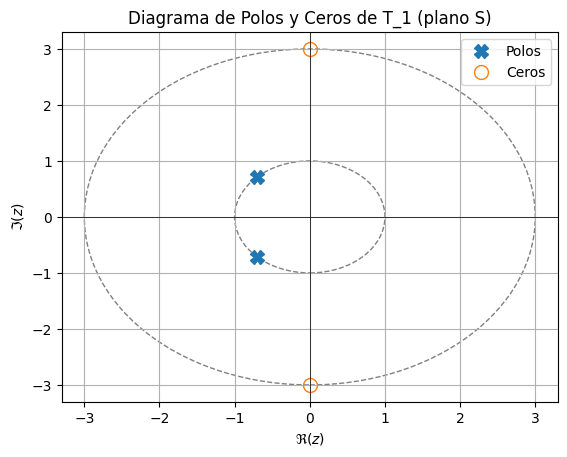

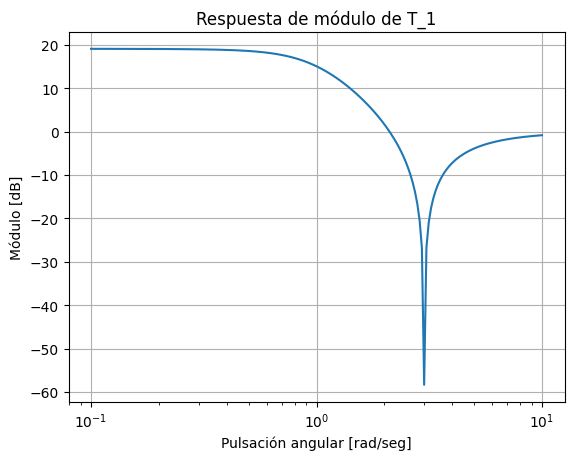

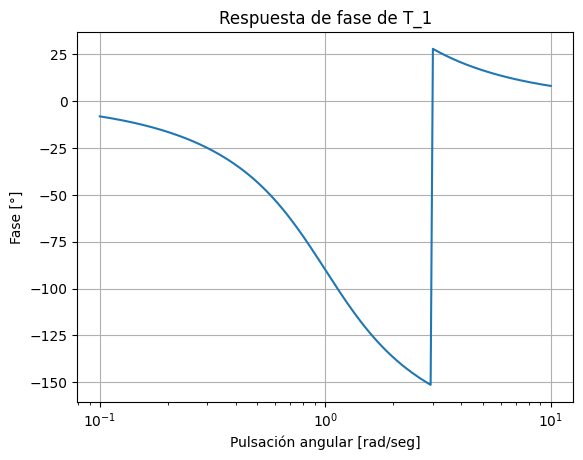

In [49]:
fig, ax = plt.subplots()

circ_1z = plt.Circle ((0, 0), radius=3, fill=False, ls='--', color='gray')
ax.add_patch(circ_1z)
circ_1p = plt.Circle ((0, 0), radius=1, fill=False, ls='--', color='gray')
ax.add_patch(circ_1p)

ax.plot (np.real(p_1), np.imag(p_1), ls='', marker='X', markersize=10, label='Polos')
if len(z_1) > 0:
    ax.plot (np.real(z_1), np.imag(z_1), ls='', marker='o', markersize=10, fillstyle='none', label='Ceros')
plt.axhline (0, color='k', lw=0.5)
plt.axvline (0, color='k', lw=0.5)

plt.title ('Diagrama de Polos y Ceros de T_1 (plano S)')
plt.xlabel (r'$\Re(z)$')
plt.ylabel (r'$\Im(z)$')
plt.legend ()
plt.grid (True)
plt.show ()

plt.figure (1)

plt.semilogx (w_1, 20*np.log10(h_1_abs))
plt.title ('Respuesta de módulo de T_1')
plt.xlabel ('Pulsación angular [rad/seg]')
plt.ylabel ('Módulo [dB]')
plt.grid (True)

plt.figure (2)

plt.semilogx (w_1, np.degrees(fase_1))
plt.title ('Respuesta de fase de T_1')
plt.xlabel ('Pulsación angular [rad/seg]')
plt.ylabel ('Fase [°]')
plt.grid (True)

---

#### Ceros de $T_{1(s)}$

$\circ$ Distancia al origen dada por $\omega^2_{0Z}=9 \iff \omega_{0Z}=3$
  
$\circ$ Ángulo de apertura dado por $\frac{\omega_{0Z}}{Q_Z}=0 \iff Q_Z\rightarrow\infty \iff Q_Z=\frac{1}{2\cos{\psi}}\rightarrow\infty \iff \psi_Z\rightarrow\pi/2$

---

#### Polos de $T_{1(s)}$

$\circ$ Distancia al origen dada por $\omega^2_{0P}=1 \iff \omega_{0P}=1$
  
$\circ$ Ángulo de apertura dado por $\frac{\omega_{0P}}{Q_P}=\sqrt{2} \iff Q_P=\frac{1}{\sqrt{2}} \iff \frac{1}{2\cos{\psi}}=\frac{1}{\sqrt{2}} \iff \psi_P=\pi/4$

---

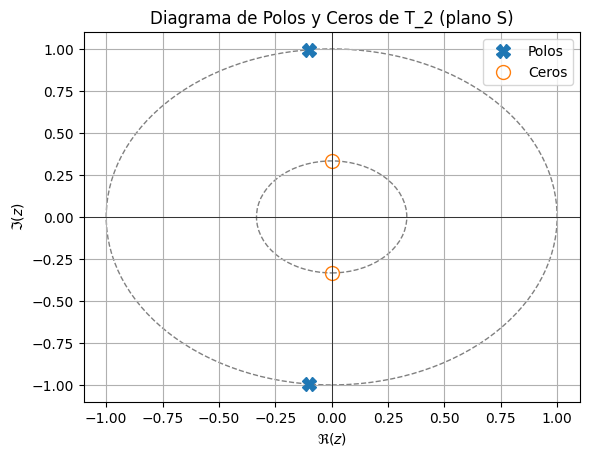

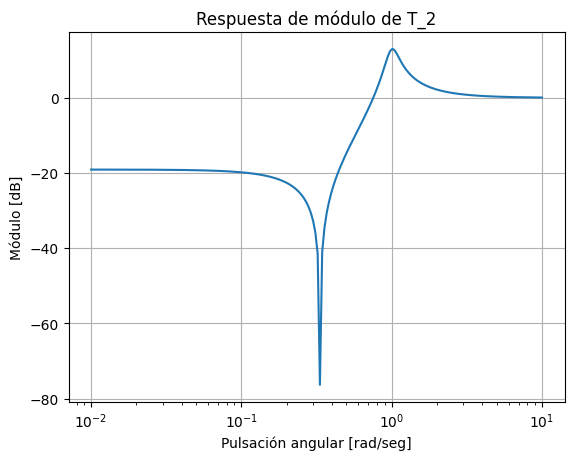

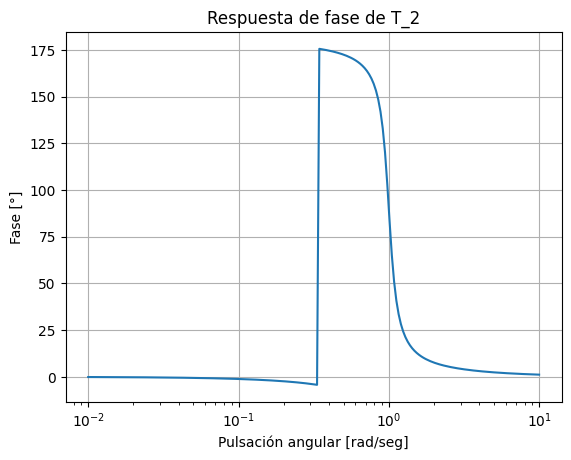

In [50]:
fig, ax = plt.subplots()

circ_2z = plt.Circle ((0, 0), radius=1/3, fill=False, ls='--', color='gray')
ax.add_patch(circ_2z)
circ_2p = plt.Circle ((0, 0), radius=1, fill=False, ls='--', color='gray')
ax.add_patch(circ_2p)

ax.plot (np.real(p_2), np.imag(p_2), ls='', marker='X', markersize=10, label='Polos')
if len(z_1) > 0:
    ax.plot (np.real(z_2), np.imag(z_2), ls='', marker='o', markersize=10, fillstyle='none', label='Ceros')
plt.axhline (0, color='k', lw=0.5)
plt.axvline (0, color='k', lw=0.5)

plt.title ('Diagrama de Polos y Ceros de T_2 (plano S)')
plt.xlabel (r'$\Re(z)$')
plt.ylabel (r'$\Im(z)$')
plt.legend ()
plt.grid (True)

plt.figure (3)

plt.semilogx (w_2, 20*np.log10(h_2_abs))
plt.title ('Respuesta de módulo de T_2')
plt.xlabel ('Pulsación angular [rad/seg]')
plt.ylabel ('Módulo [dB]')
plt.grid (True)

plt.figure (4)

plt.semilogx (w_2, np.degrees(fase_2))
plt.title ('Respuesta de fase de T_2')
plt.xlabel ('Pulsación angular [rad/seg]')
plt.ylabel ('Fase [°]')
plt.grid (True)

---

#### Ceros de $T_{2(s)}$

$\circ$ Distancia al origen dada por $\omega^2_{0Z}=1/9 \iff \omega_{0Z}=1/3$
  
$\circ$ Ángulo de apertura dado por $\frac{\omega_{0Z}}{Q_Z}=0 \iff Q_Z\rightarrow\infty \iff Q_Z=\frac{1}{2\cos{\psi}}\rightarrow\infty \iff \psi_Z\rightarrow\pi/2$

---

#### Polos de $T_{2(s)}$

$\circ$ Distancia al origen dada por $\omega^2_{0P}=1 \iff \omega_{0P}=1$
  
$\circ$ Ángulo de apertura dado por $\frac{\omega_{0P}}{Q_P}=\frac{1}{5} \iff Q_P=5 \iff \frac{1}{2\cos{\psi}}=5 \iff \psi_P\approx0.37\pi\approx66.42°$

---

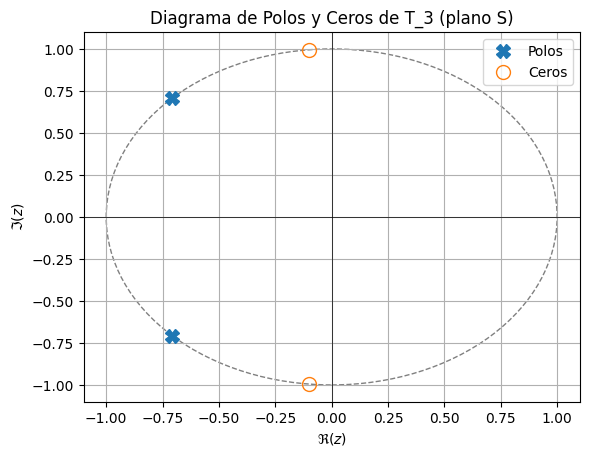

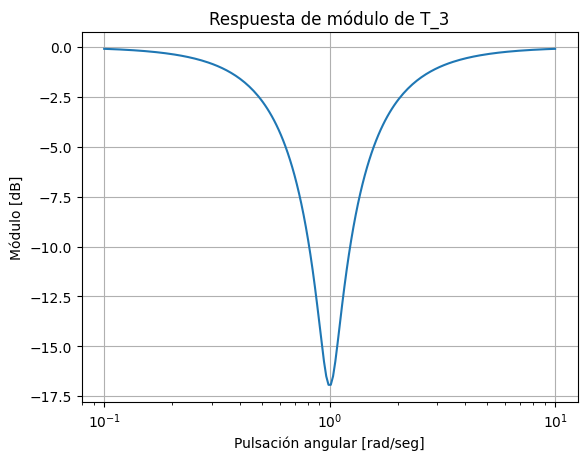

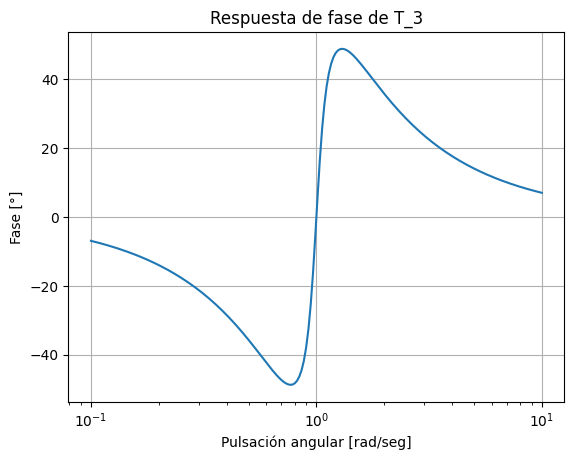

In [51]:
fig, ax = plt.subplots()

circ_3 = plt.Circle ((0, 0), radius=1, fill=False, ls='--', color='gray')
ax.add_patch(circ_3)

plt.plot (np.real(p_3), np.imag(p_3), ls='', marker='X', markersize=10, label='Polos')
if len(z_1) > 0:
    plt.plot (np.real(z_3), np.imag(z_3), ls='', marker='o', markersize=10, fillstyle='none', label='Ceros')
plt.axhline (0, color='k', lw=0.5)
plt.axvline (0, color='k', lw=0.5)


plt.title ('Diagrama de Polos y Ceros de T_3 (plano S)')
plt.xlabel (r'$\Re(z)$')
plt.ylabel (r'$\Im(z)$')
plt.legend ()
plt.grid (True)

plt.figure (5)

plt.semilogx (w_3, 20*np.log10(h_3_abs))
plt.title ('Respuesta de módulo de T_3')
plt.xlabel ('Pulsación angular [rad/seg]')
plt.ylabel ('Módulo [dB]')
plt.grid (True)

plt.figure (6)

plt.semilogx (w_3, np.degrees(fase_3))
plt.title ('Respuesta de fase de T_3')
plt.xlabel ('Pulsación angular [rad/seg]')
plt.ylabel ('Fase [°]')
plt.grid (True)

---

#### Ceros de $T_{3(s)}$

$\circ$ Distancia al origen dada por $\omega^2_{0Z}=1 \iff \omega_{0Z}=1$
  
$\circ$ Ángulo de apertura dado por $\frac{\omega_{0Z}}{Q_Z}=\frac{1}{5} \iff Q_Z=5 \iff \frac{1}{2\cos{\psi}}=5 \iff \psi_Z\approx0.37\pi\approx66.42°$

---

#### Polos de $T_{3(s)}$

$\circ$ Distancia al origen dada por $\omega^2_{0P}=1 \iff \omega_{0P}=1$
  
$\circ$ Ángulo de apertura dado por $\frac{\omega_{0P}}{Q_P}=\sqrt{2} \iff Q_P=\frac{1}{\sqrt{2}} \iff \frac{1}{2\cos{\psi}}=\frac{1}{\sqrt{2}} \iff \psi_P=\pi/4$

---

Con el fin de simular las redes y verificar estos resultados, se implementaron los respectivos circuitos en el software LTSpice. Esto permitió, además, observar a través de un "osciloscopio" el comportamiento de los diversos elementos de la red y, en especial, el de $V_{out}$, que para la configuración establecida corresponde a la **respuesta en frecuencia**.

#### *Desarrollo en LTSpice...*

El siguiente circuito fue diseñado de manera tal que, al modificar los parámetros correctamente, se obtengan las funciones transferencia con las que se viene trabajando, de las cuales nos interesa visualizar sus correspondientes respuestas en frecuencia.

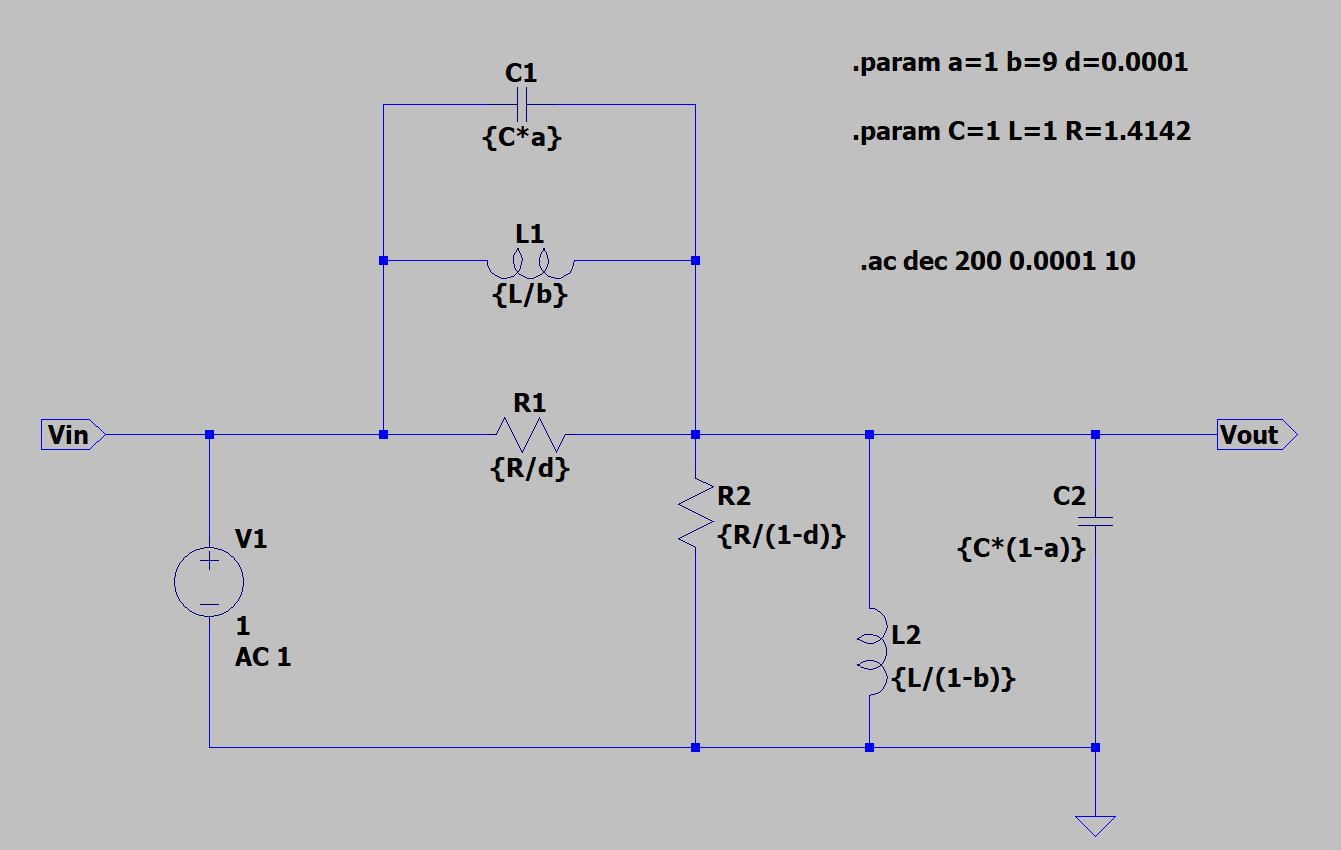

#### Respuesta en frecuencia de $T_{1(s)}$


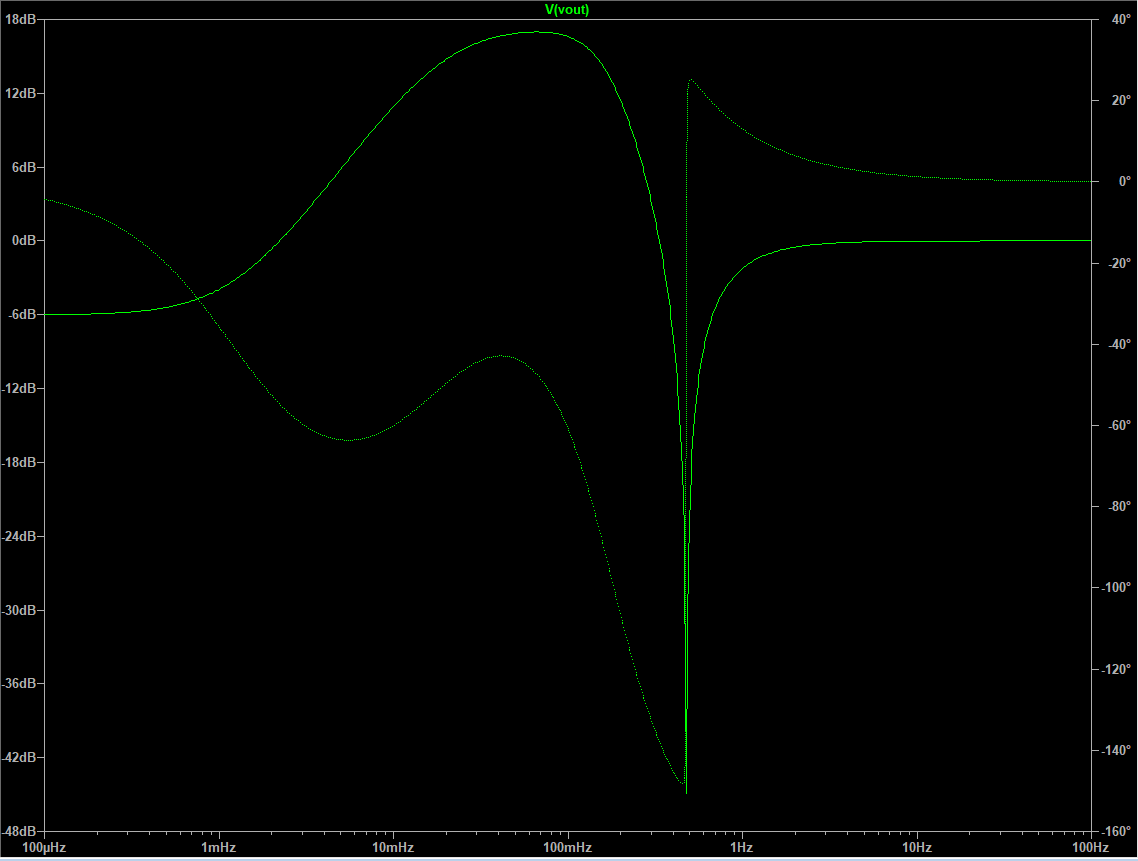

#### Respuesta en frecuencia de $T_{2(s)}$


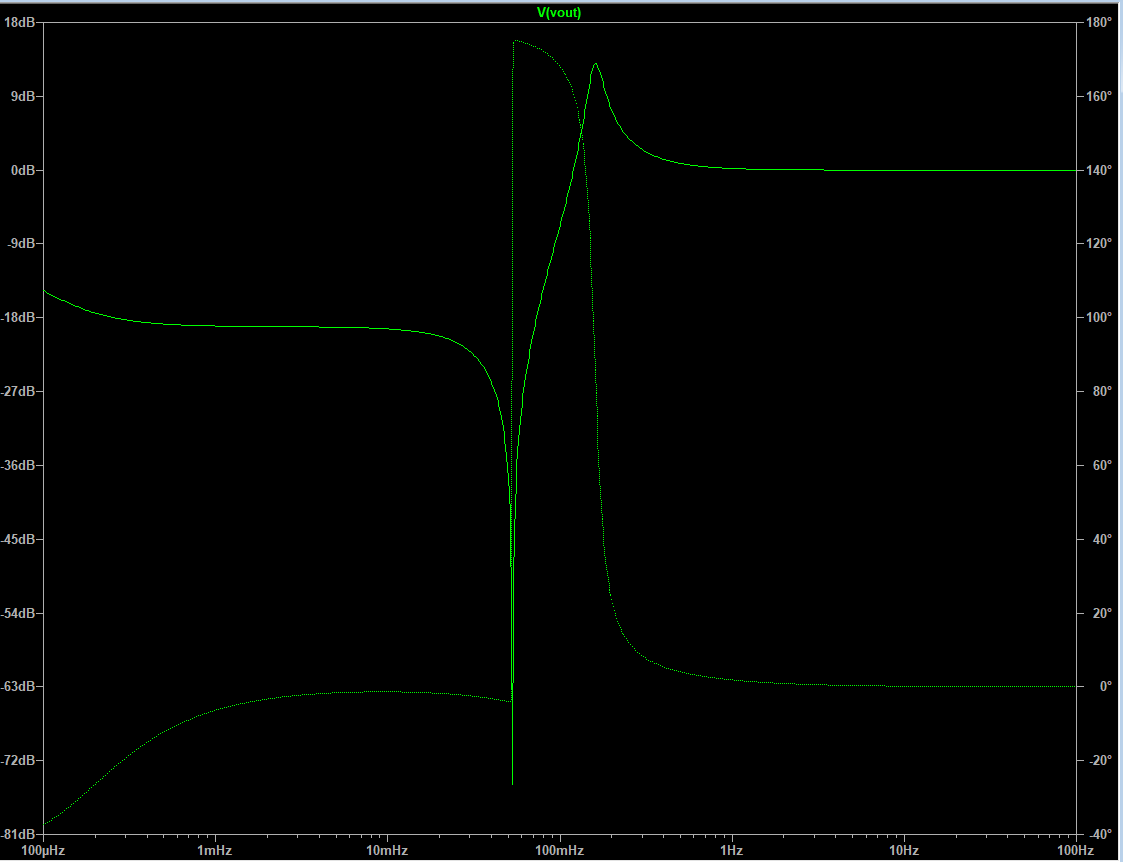

#### Respuesta en frecuencia de $T_{3(s)}$


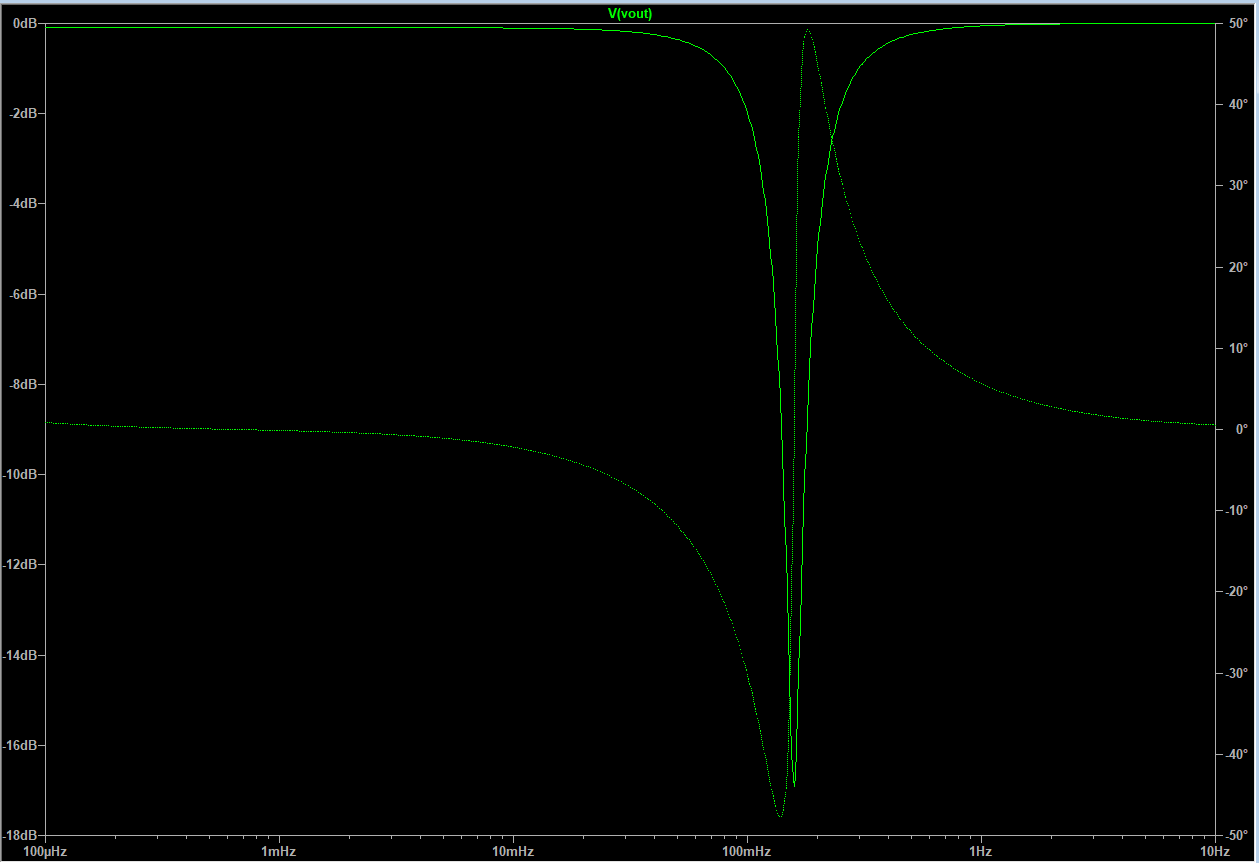

Conectar en cascada las redes $T_{1(s)}$ y $T_{2(s)}$ implica multiplicar ambas secciones bicuadráticas. Esto da como resultado un nuevo filtro cuyo diagrama de polos y ceros será la superposición de los correspondientes a cada uno de ellos. Además, la representación en dB de ambas respuestas de módulo se sumarán, dando lugar a dos frecuencias claramente suprimidas: los 480mHz de $T_1$ y los 53mHz de $T_2$. De conectar dos filtros idénticos, el comportamiento del filtro resultante será aún más marcado y determinante, pues la atenuación en dB resulta en una suma de ambas atenuaciones para las mismas frecuencias.

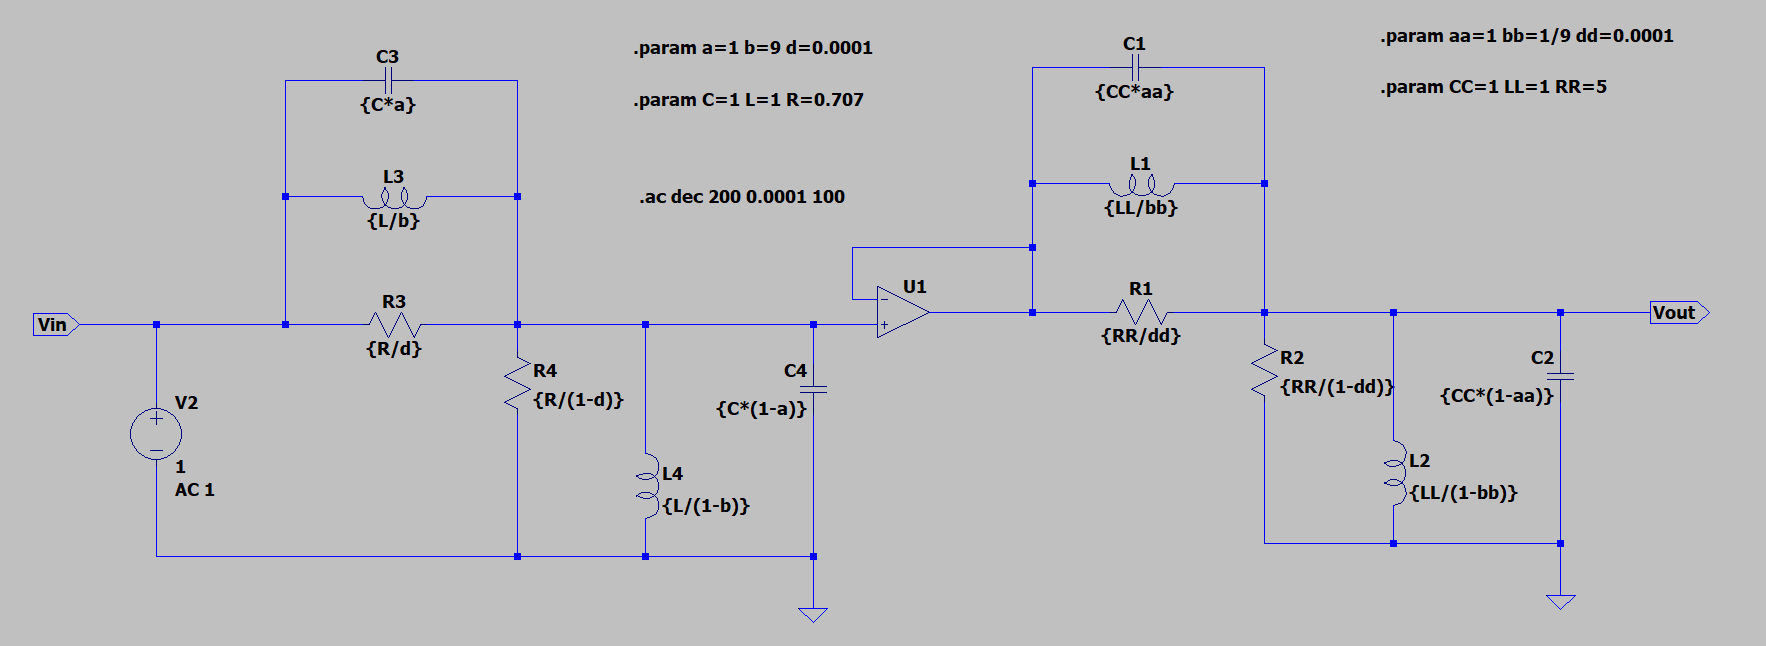

## Conclusiones

Analizar la respuesta en frecuencia de un filtro analógico pasivo permite...
1) **Reconocer las frecuencias atenuadas**: al analizar su módulo, es decir $|T_{(j\omega)}|$, se pueden identificar qué frecuencias pasan (aquellas que se encuentren cercanas a los 0dB de atenuación) y cuáles son suprimidas.
2) **Reconocer la fase de cada frecuencia**: dependiendo el comportamiento de la fase, podemos predecir cuán demorada estará cada frecuencia de la señal filtrada respecto de la señal original. Es decir, un fase lineal implica una demora constante, y cuanta mayor tendencia a una franja horizontal tenga, menor será dicha demora. Por el contrario, una pendiente abrupta y empinada en la fase, conlleva una demora significativamente mayor.

En base a estos conceptos, se concluye lo siguiente acerca de las funciones analizadas...

$T_{1(j\omega)} \rightarrow$ Se observa una gran atenuación, de aproximadamente -45dB, para las frecuencias cercanas a los 480mHz, tras lo cual, la misma disminuye hasta prácticamente los 0dB, resultado aparentemente asintótico a partir de los 10Hz. En cuanto a la fase, se puede concluir que producirá una gran demora en las frecuencias sub-Hertz, principalmente en los 480mHz mencionados. Pasado el Hertz, se comporta asintóticamente como una recta horizontal, y por lo tanto, con una demora casi nula.

$T_{2(j\omega)} \rightarrow$ En este caso, la frecuencia claramente suprimida corresponde a los 53mHz, con una fuerte atenuación máxima de -75dB. De manera similar, la fase con pendiente más abrupta se encuentra en torno a esta frecuencia, por lo cual, será la que mayor retardo de grupo conlleve. Nuevamente, se puede concluir que a partir de 1Hz, tanto la atenuación como la fase presentan un comportamiento asintóticamente horizontal: la atenuación se aproxima a los 0dB, mientras que la fase a los 0 radianes.

$T_{3(j\omega)} \rightarrow$ Esta función posee un claro comportamiento de suprimebanda, pues resulta con nula atenuación para todo el espectro de frecuencias (incluso las sub-Hertz), a excepción de las cercanas a 160mHz, donde sufre una atenuación máxima de -17dB. De igual manera, la fase presenta cierta simetría respecto a dicha frecuencia, sobre la cual la demora también será máxima. Tanto para las frecuencias sub-10mHz como a partir de los 10Hz, ambos fenómenos, la atenuación y la fase, presentan una asíntota hacia los 0dB y los 0 radianes, respectivamente. Por lo tanto, a partir de dichos 10Hz, la señal filtrada será prácticamente idéntica a la señal original.

## Autoevaluación del aprendizaje

Realmente siento que le di un fuerte ajuste a un montón de conceptos que en clase me parecían abstractos, y al bajarlos a algo prácico (y para eso me sirvió mucho el desarrollo en LTSpice) veo todo un poco más claro. No me pude extender demasiado en las conclusiones, todavía tengo ciertas dudas que en clase, o mediante estas correcciones, me gustaría aclarar. Tenía entendido que los filtros pasivos no pueden tener una ganancia mayor a 0dB (salvo por efecto de la resonancia), que únicamente pueden atenuar, a falta de un aporte de energía externo. Sin embargo, hay comportamientos que no puedo explicar, como el que presenta la respuesta de módulo de la T_1 en frecuencias sub-Hertz, aunque puede que sea error mío con el LTSpice o en el código.